In [ ]:
pip install easygui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2 #for image processing
import easygui #to open the filebox (didnt use)
import numpy as np #to store image (stored and processed as numbers. as arrays)
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt # visualization and plotting
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [ ]:
""" fileopenbox opens the box to choose file
and help us store file path as string """
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving originalmage.png to originalmage (3).png


In [ ]:
ImagePath="/originalmage.png"

In [ ]:
originalmage = cv2.imread(ImagePath)
originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)

In [ ]:
def cartoonify(ImagePath):
  #(1)->convert img to numpy array
              #Imread is a method in cv2 which is used to store images in the form of numbers.(image is read as a numpy array, in which cell values depict R, G, and B values of a pixel.)
              
  # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()


#NOTE: We resize the image after each transformation to display all the images on a similar scale at last.
    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')



#(1a)->converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))  #After each transformation, we resize the resultant image using the resize() method in cv2 and display it using imshow() method. 
    #plt.imshow(ReSized2, cmap='gray')


 #(1b)->applying median blur to smoothen an image
              #(center pixel is assigned a mean value of all the pixels which fall under the kernel,returning a blurred effect.)
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')

    #retrieving the edges for cartoon effect
    #by using thresholding technique

    ###Cartoon effect has two specialties:  Highlighted Edges and Smooth colors
    


    #we try to retrieve the edges and highlight them  by the adaptive thresholding technique. (threshold value is the mean of the neighborhood pixel values area minus the constant C. C is a constant that is subtracted from the mean or weighted sum of the neighborhood pixels. )



    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')

  #(1c)->Preparing a Mask Image by applying bilateral filter to remove noise 
        #a lightened image is created masked with edges 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)#removes the noise (smoothening )   (read about the parameters )
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')


    #masking edged image with our "BEAUTIFY" image(combining the two qualities of a catoonisized image)
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)#done using MASKING. perform bitwise and on two images to mask them as the images are still just numbers.

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]# list here is named “images”  , of all images 

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()

In [ ]:
from tkinter import * 

In [ ]:
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    global top
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)
    top=tk.Tk()
    top.geometry('400x400')
    top.title('Cartoonify Your Image !')
    top.configure(background='white')
    label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))
    upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
    upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    upload.pack(side=TOP,pady=50)
    save1=Button(top,text="Save cartoon image",command=lambda: save(ImagePath, ReSized6),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    top.mainloop()


In [ ]:
global top

NameError: ignored

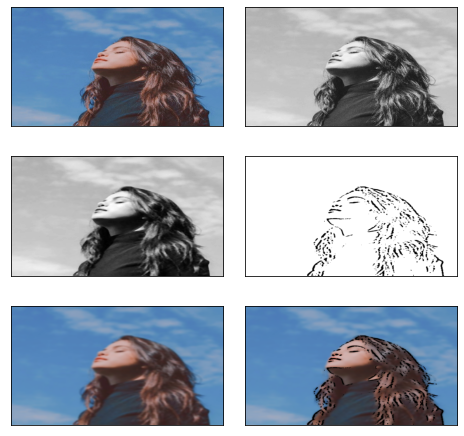

In [ ]:
cartoonify(ImagePath)